In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shai-ml/sample_submission.csv
/kaggle/input/shai-ml/train.csv
/kaggle/input/shai-ml/test.csv


# Import Library

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 

In [3]:
%config Completer.use_jedi = False

In [4]:
train_df = pd.read_csv("../input/shai-ml/train.csv")
train_df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
5,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
6,11,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
7,13,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
8,14,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
9,15,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27


In [5]:
test_data = pd.read_csv("../input/shai-ml/test.csv")
test_data.drop('Unnamed: 0', axis=1, inplace=True)
test_data.head(10)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
2,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
3,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39
4,0.23,Ideal,J,VS1,62.8,56.0,3.93,3.90,2.46
5,0.23,Very Good,E,VS2,63.8,55.0,3.85,3.92,2.48
6,0.23,Very Good,H,VS1,61.0,57.0,3.94,3.96,2.41
7,0.23,Very Good,G,VVS2,60.4,58.0,3.97,4.01,2.41
8,0.23,Very Good,D,VS2,60.5,61.0,3.96,3.97,2.40
9,0.23,Very Good,F,VS1,60.9,57.0,3.96,3.99,2.42


# About Dataset
# Context
* This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.
* 
* Content price price in US dollars (\$326--\$18,823)
* 
* carat weight of the diamond (0.2--5.01)
* 
* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* 
* color diamond colour, from J (worst) to D (best)
* 
* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* 
* x length in mm (0--10.74)
* 
* y width in mm (0--58.9)
* 
* z depth in mm (0--31.8)
* 
* depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* 
* table width of top of diamond relative to widest point (43--95)

In [6]:
# Checking for missing values and categorical variables in the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


### **<span style="color:#000080;">Note: </span>**
##### There are 43040  non-null values in all the attributes thus no missing values.
##### Datatype of features 'cut', 'color' & 'clarity' is "object" which needs to be converted into numerical variable (will be done in data preprocessing) before we feed the data to algorithms. 

### **<span style="color:#000080;"><center>Data Types</center></span>**

In [7]:
# Column name Unnamed:0 isn't avalid colmun. , so we will drop it

train_df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43040 non-null  float64
 1   cut      43040 non-null  object 
 2   color    43040 non-null  object 
 3   clarity  43040 non-null  object 
 4   depth    43040 non-null  float64
 5   table    43040 non-null  float64
 6   price    43040 non-null  int64  
 7   x        43040 non-null  float64
 8   y        43040 non-null  float64
 9   z        43040 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [9]:
train_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### **<span style="color:#000080;"><center>Exploratory Data Analysis</center></span>**

In [10]:
train_df.describe()

,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### **<span style="color:#000080;">Note: </span>**
#### "Price" as expected is right skewed, having more number of data points in left
#### Under dimensional features of 'x', 'y' & 'z' - min value is 0 thus making such datapoints either a 1D or 2D diamond object which doesn't make much sense - so needs either to be imputed with appropriate value or dropped altogether.
#### so we make this in above
* train_df = train_df[train_df['x']!=0]
* train_df = train_df[train_df['y']!=0]
* train_df = train_df[train_df['z']!=0]


In [11]:
train_df = train_df[train_df['x']!=0]
train_df = train_df[train_df['y']!=0]
train_df = train_df[train_df['z']!=0]

In [12]:
train_df.describe()

,carat,depth,table,price,x,y,z
count,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000
mean,0.796685,61.746194,57.439135,3940.751807,5.724874,5.728482,3.535764
std,0.481183,1.434901,2.239621,4021.138491,1.129919,1.157478,0.711221
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.380000,61.000000,56.000000,939.500000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2387.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5306.000000,6.500000,6.500000,4.020000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Text(0.5, 1.0, 'Theme for EDA')

<Figure size 432x288 with 0 Axes>

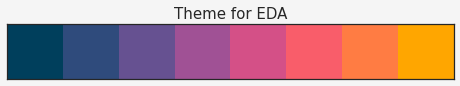

In [13]:
colors=['#003f5c','#2f4b7c','#665191','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600']
sns.set(palette=colors, font='San', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})
sns.despine(left=False, right=False)
sns.palplot(colors)
plt.title("Theme for EDA", family='Sherif', size=15, weight=50)

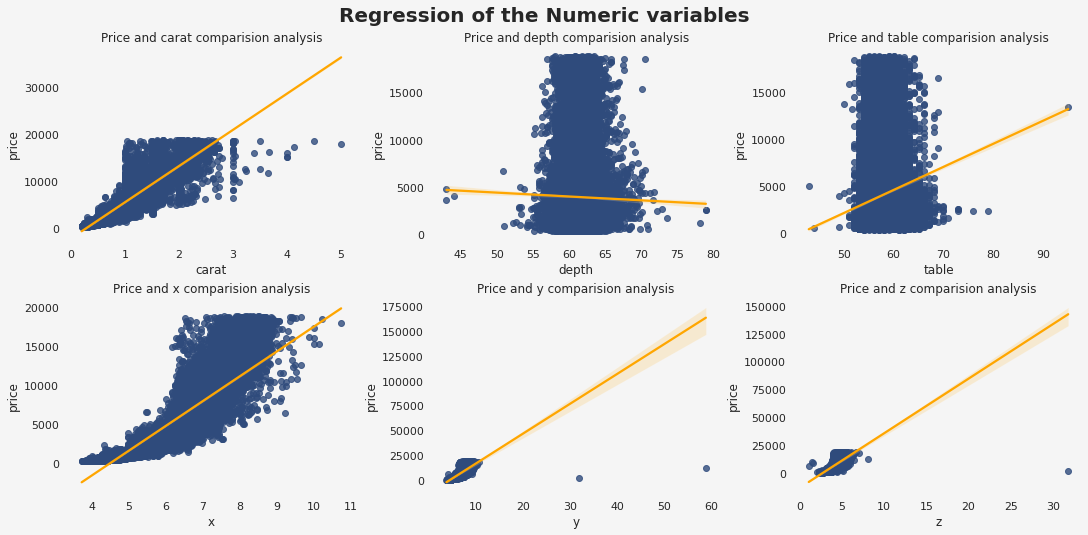

In [14]:
int_cols = train_df.select_dtypes(exclude='object').columns.to_list()
#print(int_cols)
int_cols.remove('price')
j=0
fig=plt.figure(figsize=(15,10), constrained_layout =True)
plt.suptitle("Regression of the Numeric variables", family='Sherif', size=20, weight='bold')
for i in int_cols:
    ax=plt.subplot(331+j)
    #ax.set_title('Title')
    #print(df[i])
    ax=sns.regplot(data=train_df, x=i, y='price', color=colors[1], line_kws={'color':'#ffa600'})
    ax.set_title("Price and {} comparision analysis".format(i), family='Sherif')
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    
    j=j+1

    

**Above chart shows the linear relationship with the Target variable, however, there are outliers**

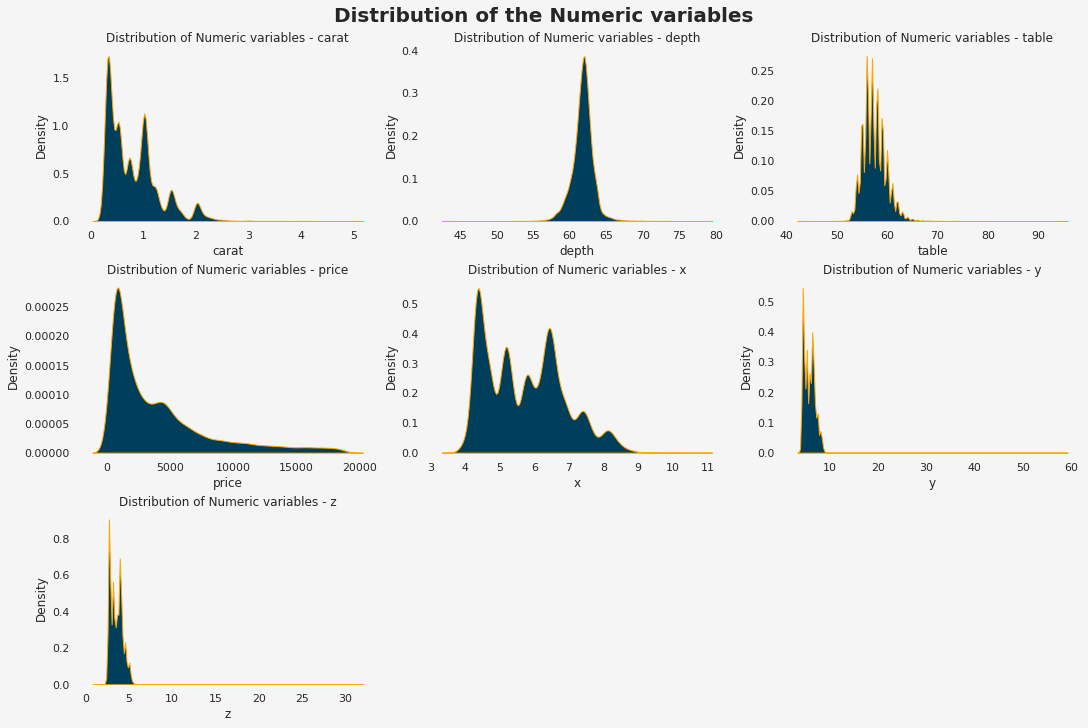

In [15]:
# let us find the distribution of integer variables
int_cols = train_df.select_dtypes(exclude='object').columns.to_list()
j=0
fig=plt.figure(figsize=(15,10), constrained_layout =True)
plt.suptitle("Distribution of the Numeric variables", family='Sherif', size=20, weight='bold')
for i in int_cols:
    ax=plt.subplot(331+j)
    #ax.set_title('Title')
    #print(df[i])
    ax=sns.kdeplot(data=train_df, x=i, color=colors[0], fill=True, edgecolor=colors[-1], alpha=1)
    ax.set_title("Distribution of Numeric variables - {}".format(i), family='Sherif')
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    
    j=j+1

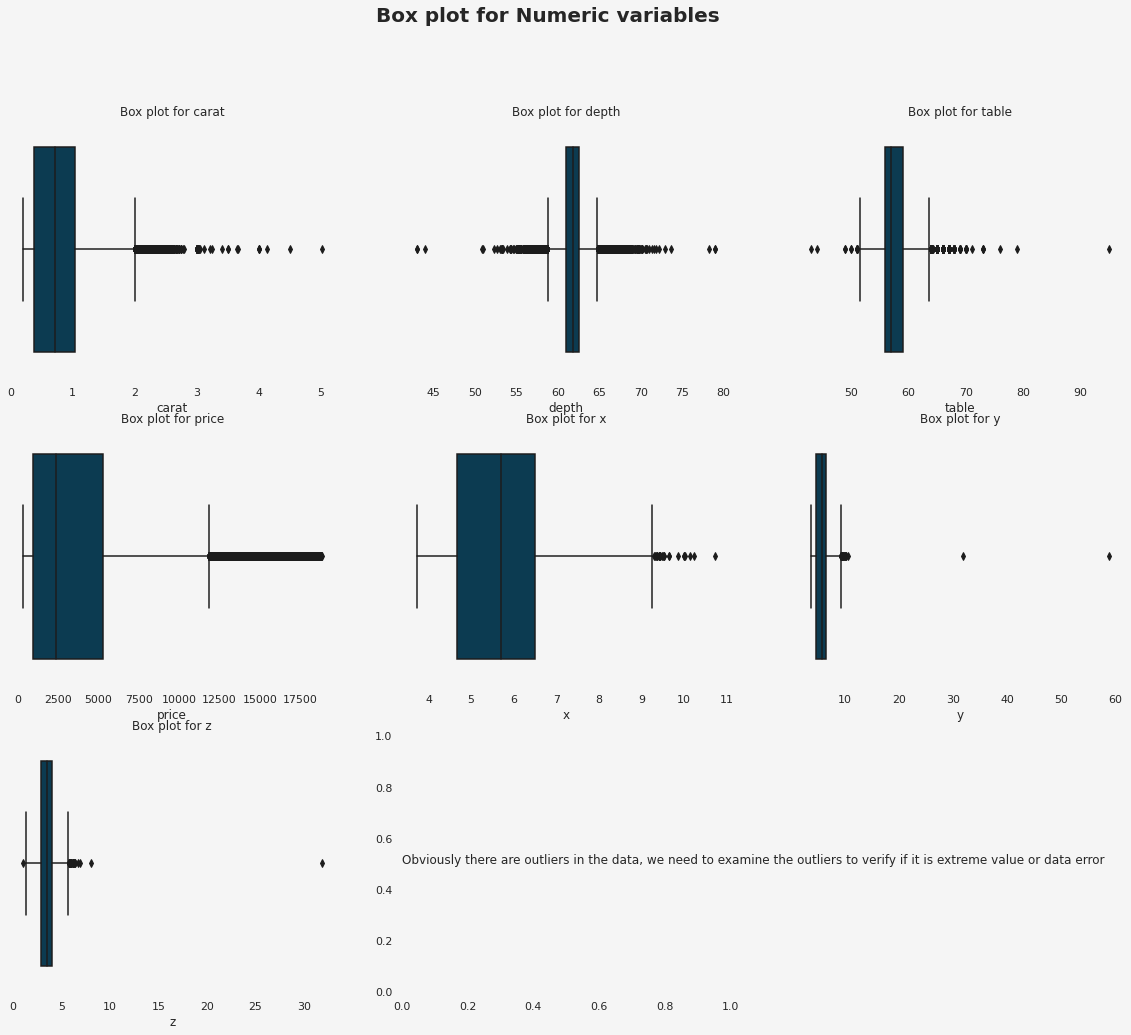

In [16]:
j=0
fig=plt.figure(figsize=(20,16))
plt.suptitle("Box plot for Numeric variables", family='Sherif', size=20, weight='bold')
for i in int_cols:
    ax=plt.subplot(331+j)
    #ax.set_title('Title')
    #print(df[i])
    ax=sns.boxplot(data=train_df, x=i,color=colors[0])
    ax.set_title("Box plot for {}".format(i))
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1
ax=plt.subplot(331+j)
ax.text(x=0,y=0.5, s='Obviously there are outliers in the data, we need to examine the outliers to verify if it is extreme value or data error')
for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)

# Now, we will check test data

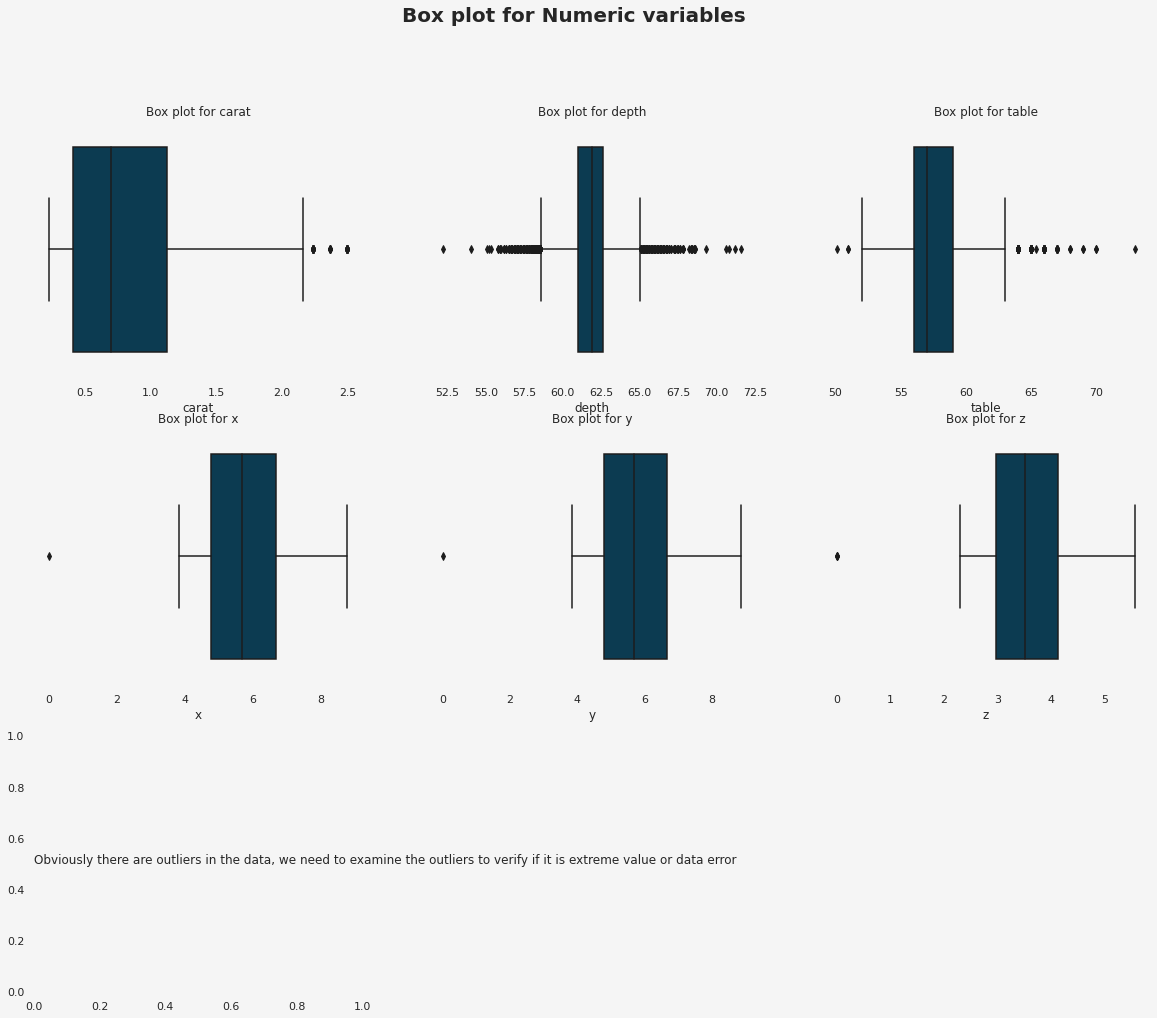

In [17]:
int_cols2 = test_data.select_dtypes(exclude='object').columns.to_list()

j=0
fig=plt.figure(figsize=(20,16))
plt.suptitle("Box plot for Numeric variables", family='Sherif', size=20, weight='bold')
for i in int_cols2:
    ax=plt.subplot(331+j)
    #ax.set_title('Title')
    #print(df[i])
    ax=sns.boxplot(data=test_data, x=i,color=colors[0])
    ax.set_title("Box plot for {}".format(i))
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1
ax=plt.subplot(331+j)
ax.text(x=0,y=0.5, s='Obviously there are outliers in the data, we need to examine the outliers to verify if it is extreme value or data error')
for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)

### **<span style="color:#000080;"><center>DATA PREPROCESSING</center></span>**

# Data cleaning

In [18]:
test_data.shape

(10900, 9)

In [19]:
test_data.describe()

,carat,depth,table,x,y,z
count,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000
mean,0.801794,61.762532,57.526844,5.757932,5.759811,3.555975
std,0.443401,1.422198,2.210543,1.077961,1.069891,0.669389
min,0.230000,52.200000,50.100000,0.000000,0.000000,0.000000
25%,0.410000,61.000000,56.000000,4.790000,4.800000,2.970000
50%,0.700000,61.900000,57.000000,5.680000,5.690000,3.520000
75%,1.130000,62.600000,59.000000,6.700000,6.690000,4.130000
max,2.500000,71.600000,73.000000,8.800000,8.890000,5.580000


In [20]:
# test_df.drop('Unnamed: 0', axis=1, inplace=True)
# test_df = test_df[test_df['x']!=0]
# test_df = test_df[test_df['y']!=0]
# test_df = test_df[test_df['z']!=0]

### **<span style="color:#000080;">Removing Outliers for train data: </span>**


In [21]:
# Dropping the outliers (since we have huge dataset) by defining appropriate measures across features 
# Remove Outlier

def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    print("Q1 = ", Q1, " Q3 = ", Q3, " IQR = ", IQR)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Extract all column names as list in Pandas Dataframe
lst_all_cols = train_df.columns.tolist()
print("lst_all_cols : \n",lst_all_cols)

print("\n")
# Numerical data distribution
print(list(set(train_df.dtypes.tolist())))
df_num = train_df.select_dtypes(include = ["float64", "int64"])
lst_num_cols = df_num.columns.tolist()
print("Numerical Data : \n",lst_num_cols)
print("\n")


indx = 0
for col in lst_num_cols:
    print(indx)
    lower_range, upper_range =  remove_outlier(train_df[col])
    train_df[col] = np.where(train_df[col] < lower_range, lower_range, train_df[col]) 
    train_df[col] = np.where(train_df[col] > upper_range, upper_range, train_df[col])
    indx = indx +1
    print("-----------------------------")


lst_all_cols : 
 ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']


[dtype('int64'), dtype('float64'), dtype('O')]
Numerical Data : 
 ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


0
Q1 =  0.38  Q3 =  1.03  IQR =  0.65
-----------------------------
1
Q1 =  61.0  Q3 =  62.5  IQR =  1.5
-----------------------------
2
Q1 =  56.0  Q3 =  59.0  IQR =  3.0
-----------------------------
3
Q1 =  939.5  Q3 =  5306.0  IQR =  4366.5
-----------------------------
4
Q1 =  4.66  Q3 =  6.5  IQR =  1.8399999999999999
-----------------------------
5
Q1 =  4.67  Q3 =  6.5  IQR =  1.83
-----------------------------
6
Q1 =  2.87  Q3 =  4.02  IQR =  1.1499999999999995
-----------------------------


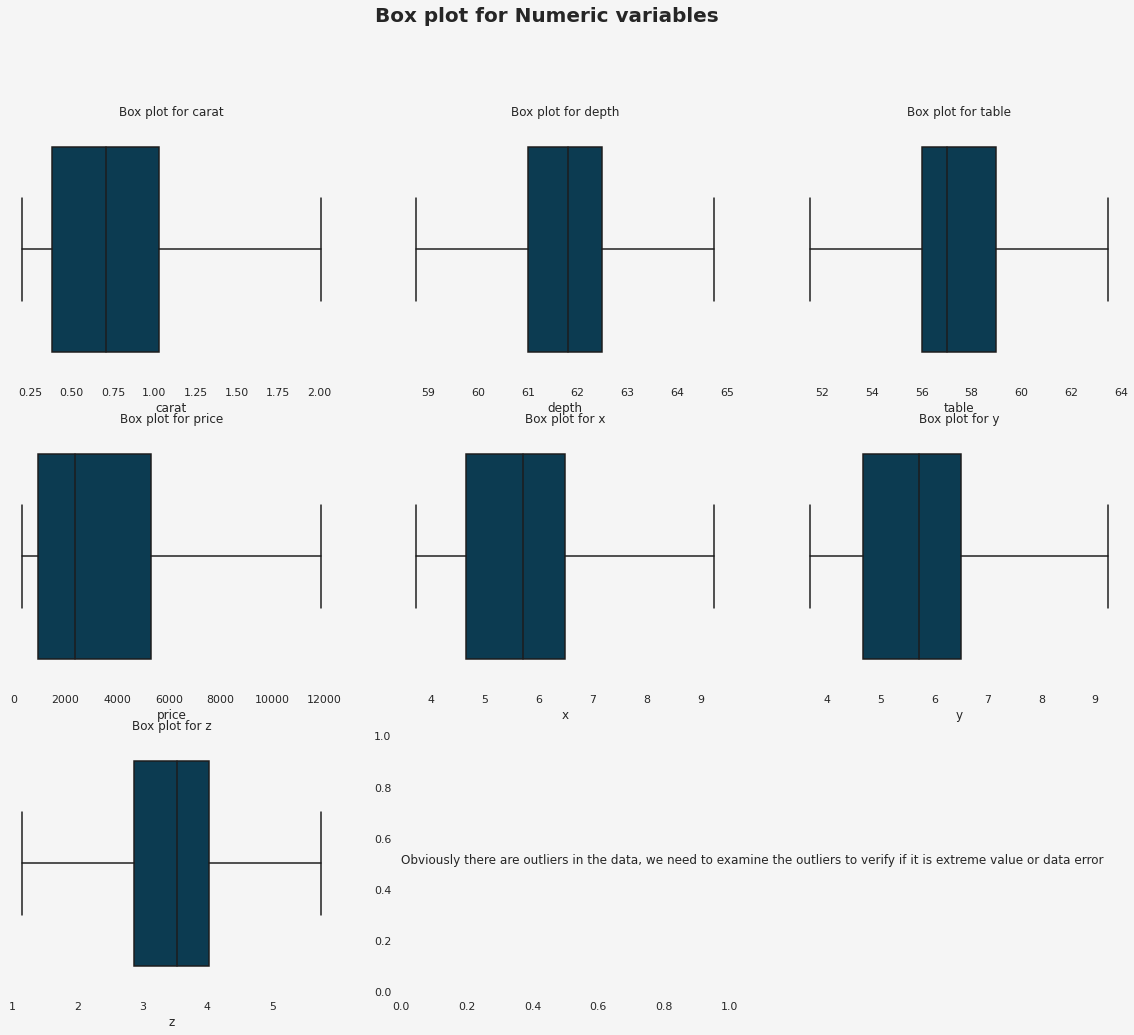

In [22]:
j=0
fig=plt.figure(figsize=(20,16))
plt.suptitle("Box plot for Numeric variables", family='Sherif', size=20, weight='bold')
for i in int_cols:
    ax=plt.subplot(331+j)
    #ax.set_title('Title')
    #print(df[i])
    ax=sns.boxplot(data=train_df, x=i,color=colors[0])
    ax.set_title("Box plot for {}".format(i))
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1
ax=plt.subplot(331+j)
ax.text(x=0,y=0.5, s='Obviously there are outliers in the data, we need to examine the outliers to verify if it is extreme value or data error')
for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)

### **<span style="color:#000080;">Removing Outliers for test data: </span>**


In [23]:
# Dropping the outliers (since we have huge dataset) by defining appropriate measures across features 
# Remove Outlier
test_df = test_data.copy()

def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    print("Q1 = ", Q1, " Q3 = ", Q3, " IQR = ", IQR)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Extract all column names as list in Pandas Dataframe
lst_all_cols = test_df.columns.tolist()
print("lst_all_cols : \n",lst_all_cols)

print("\n")
# Numerical data distribution
print(list(set(test_df.dtypes.tolist())))
df_num = test_df.select_dtypes(include = ["float64", "int64"])
lst_num_cols = df_num.columns.tolist()
print("Numerical Data : \n",lst_num_cols)
print("\n")


indx = 0
for col in lst_num_cols:
    print(indx)
    lower_range, upper_range =  remove_outlier(train_df[col])
    test_df[col] = np.where(test_df[col] < lower_range, lower_range, test_df[col]) 
    test_df[col] = np.where(test_df[col] > upper_range, upper_range, test_df[col])
    indx = indx +1
    print("-----------------------------")


lst_all_cols : 
 ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']


[dtype('float64'), dtype('O')]
Numerical Data : 
 ['carat', 'depth', 'table', 'x', 'y', 'z']


0
Q1 =  0.38  Q3 =  1.03  IQR =  0.65
-----------------------------
1
Q1 =  61.0  Q3 =  62.5  IQR =  1.5
-----------------------------
2
Q1 =  56.0  Q3 =  59.0  IQR =  3.0
-----------------------------
3
Q1 =  4.66  Q3 =  6.5  IQR =  1.8399999999999999
-----------------------------
4
Q1 =  4.67  Q3 =  6.5  IQR =  1.83
-----------------------------
5
Q1 =  2.87  Q3 =  4.02  IQR =  1.1499999999999995
-----------------------------


### **<span style="color:#000080;">Encoding Categorical Variable For Train Data: </span>**



In [24]:
# Making a copy to keep original data in its form intact
data1 = train_df.copy()

# Applying label encoder to columns with categorical data
columns = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in columns:
    data1[col] = label_encoder.fit_transform(data1[col])
data1.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000
mean,0.790795,2.543756,2.587337,3.831997,61.746066,57.420738,3727.835954,5.724655,5.726621,3.534911
std,0.462625,1.021586,1.703619,1.716601,1.267157,2.165031,3436.667463,1.129164,1.121340,0.697158
min,0.200000,0.000000,0.000000,0.000000,58.750000,51.500000,326.000000,3.730000,3.680000,1.145000
25%,0.380000,2.000000,1.000000,2.000000,61.000000,56.000000,939.500000,4.660000,4.670000,2.870000
50%,0.710000,2.000000,3.000000,4.000000,61.800000,57.000000,2387.000000,5.710000,5.720000,3.530000
75%,1.030000,3.000000,4.000000,5.000000,62.500000,59.000000,5306.000000,6.500000,6.500000,4.020000
max,2.005000,4.000000,6.000000,7.000000,64.750000,63.500000,11855.750000,9.260000,9.245000,5.745000


### **<span style="color:#000080;">Note: </span>**
##### As categorical features have been converted into numerical columns, we are getting 5-point summary along with count, mean & std for them as well. 
##### Now, we may analyze correlation matrix after getting done with pre-processing for possible feature selection in order to make our dataset more cleaner, optimal before we feed it into algorithm.

### **<span style="color:#000080;">Encoding Categorical Variable For Test Data: </span>**


In [25]:
test_df.shape

(10900, 9)

In [26]:
# Making a copy to keep original data in its form intact
# data2 = test_df.copy()

# test_df = test_df[test_df['x']!=0]
# test_df = test_df[test_df['y']!=0]
# test_df = test_df[test_df['z']!=0]

# Applying label encoder to columns with categorical data
columns = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in columns:
    test_df[col] = label_encoder.fit_transform(test_df[col])
test_df.describe()

,carat,cut,color,clarity,depth,table,x,y,z
count,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000
mean,0.799427,2.589908,2.620275,3.849266,61.761628,57.507624,5.758106,5.759988,3.556290
std,0.436187,1.050644,1.691755,1.755527,1.281069,2.143073,1.077183,1.069099,0.667983
min,0.230000,0.000000,0.000000,0.000000,58.750000,51.500000,1.900000,1.925000,1.145000
25%,0.410000,2.000000,1.000000,2.000000,61.000000,56.000000,4.790000,4.800000,2.970000
50%,0.700000,2.000000,3.000000,4.000000,61.900000,57.000000,5.680000,5.690000,3.520000
75%,1.130000,3.000000,4.000000,5.000000,62.600000,59.000000,6.700000,6.690000,4.130000
max,2.005000,4.000000,6.000000,7.000000,64.750000,63.500000,8.800000,8.890000,5.580000


In [27]:
test_df.shape

(10900, 9)

<AxesSubplot:>

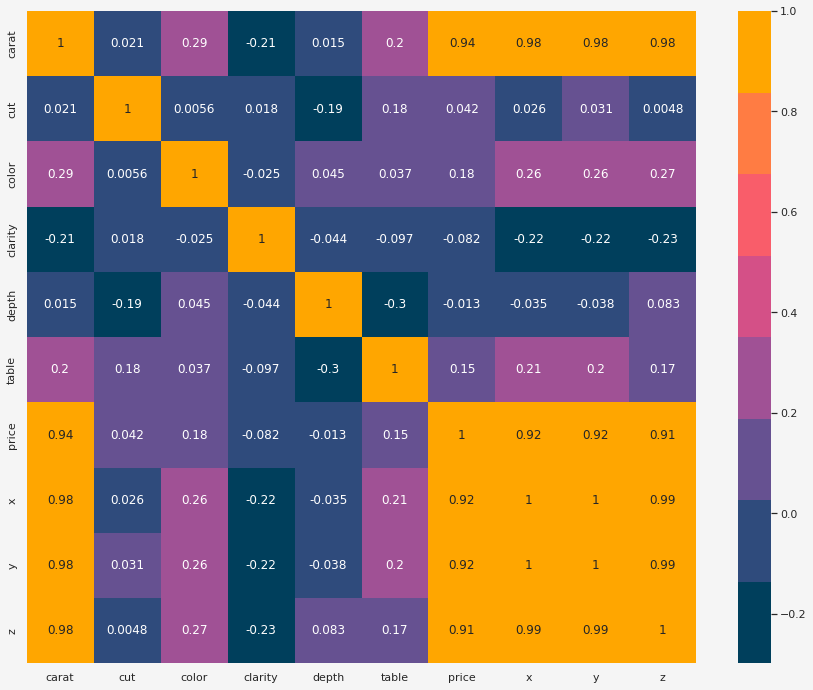

In [28]:
# Examining correlation matrix using heatmap
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
# cols = (["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat= data1.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,cmap=colors,annot=True)

### **<span style="color:#000080;">Note: </span>**
##### Features "carat", "x", "y", "z" are highly correlated to our target variable, price. 
##### Features "cut", "clarity", "depth" are very low correlated (<|0.1|) thus may be removed though due to presence of only few selected features, we won't be doing that.

In [29]:
X_train = data1.drop(["price"], axis=1)
y_train = data1["price"]
# test = data2

In [30]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

pipeline_lasso=Pipeline([("scalar2", StandardScaler()),
                      ("lasso",Lasso())])

pipeline_dt=Pipeline([("scalar3",StandardScaler()),
                     ("dt",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rf",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar5",StandardScaler()),
                     ("kn",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar6",StandardScaler()),
                     ("xgb",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest",4: "KNeighbors", 5: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [31]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=12)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

LinearRegression: 992.929237 
Lasso: 995.245745 
DecisionTree: 689.067656 
RandomForest: 525.540346 
KNeighbors: 767.161011 
XGBRegressor: 461.136477 


## Parameter tuning

In [32]:
params = {
    "n_estimators":[i for i in range(200, 400, 20)]
}

In [33]:
xgr = XGBRegressor(learning_rate=0.05)
grid = GridSearchCV(xgr, param_grid=params, cv=8, verbose=1, n_jobs=-1,
                   scoring='neg_root_mean_squared_error')
grid_search = grid.fit(X_train, y_train)
print(grid_search.best_score_)
print('*'*50)
best_params = grid_search.best_params_
print("Best params: ", best_params)

Fitting 8 folds for each of 10 candidates, totalling 80 fits
-566.37908978051
**************************************************
Best params:  {'n_estimators': 380}


In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf
}

# Initialize the RandomizedSearchCV object with estimators is RandomForestRegressor of
#cross validation is 5 with n_jobs = -1 ( that is parallel processing )
rfr = RandomForestRegressor()
random_rf = RandomizedSearchCV(rfr, param_distributions=random_grid, cv=5, n_iter=10,n_jobs=-1,
                              scoring='neg_root_mean_squared_error')

# fit the object
random_rf.fit(X_train, y_train)

# Display the best estimator
print(random_rf.best_estimator_)

# Display the best score
print(random_rf.best_score_)

# Display the best selected parameter by the randomizedSearchCV
print(random_rf.best_params_)

RandomForestRegressor(max_depth=20, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=300)
-950.0847806368422
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 20}


In [38]:
pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rf",RandomForestRegressor(n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features='auto', max_depth=20))])


pipeline_xgb=Pipeline([("scalar6",StandardScaler()),
                     ("xgb",XGBRegressor(learning_rate=0.05, n_estimators=380))])

# List of all the pipelines
pipelines = [pipeline_rf, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = { 0: "RandomForest", 1: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [39]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=12)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

RandomForest: 510.703612 
XGBRegressor: 446.086354 


we see that after parameters tuning we improve our models 

# Model prediction on test data with XGBRegressor which gave us the least RMSE 

In [40]:
test = test_df.copy()

# test = data2.drop('Unnamed: 0',axis=1)


In [41]:
pred = pipeline_xgb.predict(test)
# first_col = list(test2['Unnamed: 0'])
# price = list(pred)
# sub = pd.DataFrame({'Unnamed: 0':first_col,'price':price})
# sub.to_csv('submission.csv',index = False)
pred

array([ 365.34747,  458.9089 ,  357.7062 , ..., 2838.4714 , 2776.3552 ,
       2711.8628 ], dtype=float32)

In [42]:
len(pred)

10900

In [43]:
sub = pd.read_csv('../input/shai-ml/sample_submission.csv')
submission = pd.DataFrame()
submission['Unnamed: 0'] = sub['Unnamed: 0']
submission['Price'] = pred.reshape((pred.shape[0]))
submission.to_csv('submission.csv', index=False)